In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'


In [70]:
# change default plot resolution to 100dpi and save resolution to 300dpi
sns.set(rc={"figure.dpi": 100, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style('ticks')


In [71]:
# import data.
file_path = '../manuscript_data.xlsx'
data = pd.read_excel(file_path, sheet_name="ashes")
data.head(2)

,Locality,Author,samples,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,...,Ce,Nd,Sm,Yb,Hf,Ta,W,Pb,Th,U
0,Meishan,He et al. (2014),MS-A-25,56.276961,0.497733,29.156067,3.395642,0.000000,3.661099,1.039708,...,174.40,78.39,14.50,4.72,14.98,2.75,NaN,27.11,61.29,6.76
1,Meishan,He et al. (2014),MS-A-28,63.031161,0.806276,17.923295,5.502288,0.032687,2.767487,4.804968,...,66.84,24.18,4.41,2.68,4.92,1.13,NaN,24.90,14.95,3.33


In [72]:
# define columns for visualization.
Ti = data['TiO2']*10000
Zr = data['Zr']
Nb = data['Nb']
Nb_Y = Nb/data['Y']
Zr_Ti = Zr/Ti
Th = data['Th']

In [73]:
labels = ["Chaotian", 'Rencunping', "Jianshi", "Meishan",
            "Shangsi", "Dongpan", "mest", "Shanggang", "Qiakong"]
markers = ["^","X",'s','P', 'v', 'p', '*','8','D', 'o']
colors =["#d84727","#3625be", "#289cc9", "#f7accf",
          "red", "#51291e", "#903AB8", "#903AB8",
          'black','#33cb9c']

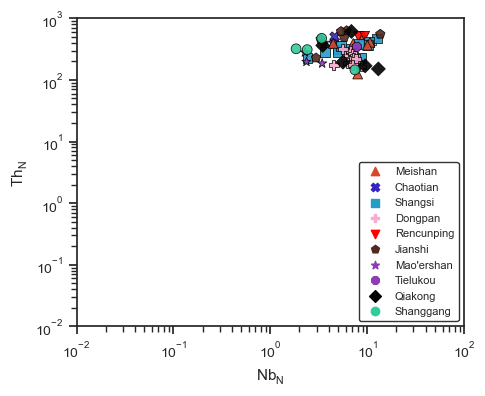

In [74]:
# plot N-MORB normalized Nb vs Th values
plt.figure(figsize=(5, 4))
p = sns.scatterplot(x=Nb/2.33, y=Th/0.12, hue='Locality', data=data,
                    alpha=0.9, style='Locality', color='black',
                    s=50, edgecolor='black',markers=markers,
                    palette=colors,
                    )
plt.xlabel('$Nb_N$', size=11, font='Arial')
plt.ylabel(u'$Th_N$', size=11, font='Arial')
p.tick_params(labelsize=10)
p.set(xscale='log', yscale='log')
p.set_xlim(.01, 100)
p.set_ylim(.01, 1000)
plt.legend(loc="lower right", frameon=True, fontsize=8,
           ncol=1, edgecolor='black', facecolor='white')
plt.savefig('../plots/ThNb_Norm.pdf', dpi=600)

In [75]:
# variables for the plots.
x = [Zr, Nb_Y]
y = [Ti, Zr_Ti]
label_x = ['Zr (ppm)', 'Nb/Y']
label_y = ['Ti (ppm)', u'Zr/Ti']
xlim = [(10, 10000), (0.01, 10)]
ylim = [(100, 100000), (0.002, 2)]
name= ['Ti_Zr.pdf', 'NbY-ZrTi.pdf']
# folder to save figures to.
save_path ='../plots/'

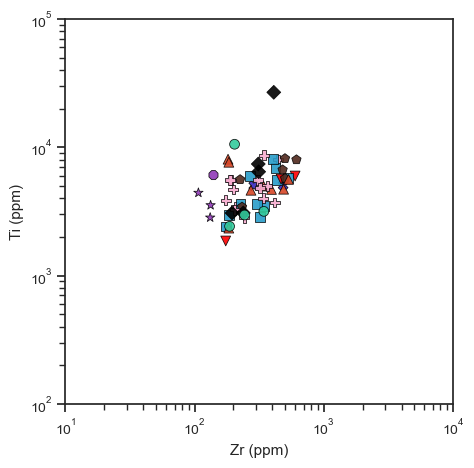

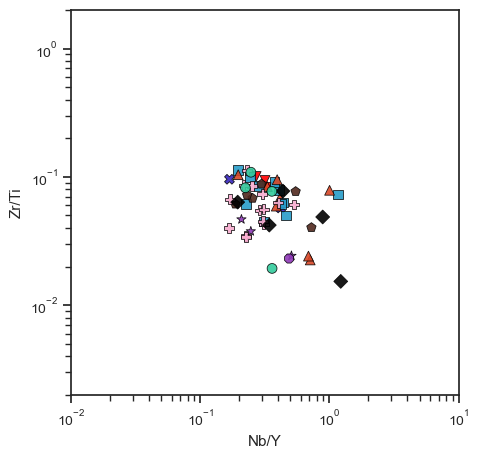

In [76]:
# Make Ti vs Zr and Nb/Y vs Zr/Ti plots iteratively.
for i in range(2):
    plt.figure(figsize=(5, 5))
    p = sns.scatterplot(x=x[i], y=y[i], hue='Locality', data=data,
                        alpha=0.9, style='Locality',
                        s=50, edgecolor='black', markers=markers,
                        color='black',  legend = False,
                        palette=colors,
                        )
    plt.xlabel(label_x[i], size=11, font='Arial')
    plt.ylabel(label_y[i], size=11, font='Arial')
    p.tick_params(labelsize=10)
    p.set(yscale='log', xscale='log')
    p.set_xlim(xlim[i])
    p.set_ylim(ylim[i])
    
    plt.savefig(f'{save_path}{name[i]}')

